In [9]:
from pandas_datareader import data as pdr
import yfinance as yf 
import matplotlib.pyplot as plt

In [2]:
yf.pdr_override()

yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


In [3]:
sec = pdr.get_data_yahoo('005930.KS',start='2018-05-04')
msft = pdr.get_data_yahoo('MSFT',start='2018-05-04')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [4]:
sec.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-04,53000.0,53900.0,51800.0,51900.0,43762.558594,39565391
2018-05-08,52600.0,53200.0,51900.0,52600.0,44352.808594,23104720
2018-05-09,52600.0,52800.0,50900.0,50900.0,42919.351562,16128305
2018-05-10,51700.0,51700.0,50600.0,51600.0,43509.597656,13905263
2018-05-11,52000.0,52200.0,51200.0,51300.0,43256.632812,10314997
2018-05-14,51000.0,51100.0,49900.0,50100.0,42244.781250,14909272
2018-05-15,50200.0,50400.0,49100.0,49200.0,41485.898438,18709146
2018-05-16,49200.0,50200.0,49150.0,49850.0,42033.984375,15918683
2018-05-17,50300.0,50500.0,49400.0,49400.0,41654.539062,10365440


In [5]:
msft.tail(10)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-09-09,407.239990,408.649994,402.149994,405.720001,405.720001,15295100
2024-09-10,408.200012,416.329987,407.700012,414.200012,414.200012,19594300
2024-09-11,415.500000,423.989990,409.579987,423.040009,423.040009,19266900
2024-09-12,423.309998,427.369995,419.750000,427.000000,427.000000,17418800
2024-09-13,425.829987,431.829987,425.459991,430.589996,430.589996,15874600
2024-09-16,430.600006,433.529999,428.220001,431.339996,431.339996,13834700
2024-09-17,440.230011,441.850006,432.269989,435.149994,435.149994,18874200
2024-09-18,435.000000,436.029999,430.410004,430.809998,430.809998,18898000
2024-09-19,441.230011,441.500000,436.899994,438.690002,438.690002,21706600


In [7]:
sec.index

DatetimeIndex(['2018-05-04', '2018-05-08', '2018-05-09', '2018-05-10',
               '2018-05-11', '2018-05-14', '2018-05-15', '2018-05-16',
               '2018-05-17', '2018-05-18',
               ...
               '2024-09-04', '2024-09-05', '2024-09-06', '2024-09-09',
               '2024-09-10', '2024-09-11', '2024-09-12', '2024-09-13',
               '2024-09-19', '2024-09-20'],
              dtype='datetime64[ns]', name='Date', length=1568, freq=None)

In [6]:
sec.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

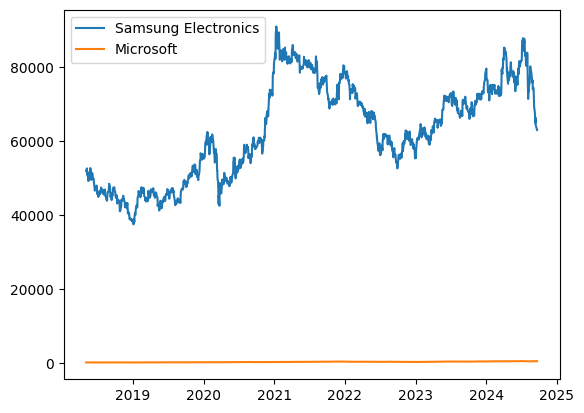

In [10]:
plt.plot(sec.index, sec.Close, label='Samsung Electronics')
plt.plot(msft.index, msft.Close, label='Microsoft')
plt.legend(loc='best')
plt.show()

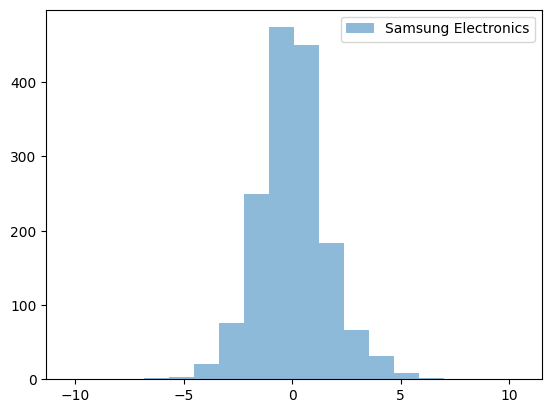

In [16]:
sec_dpc = (sec['Close'] - sec['Close'].shift(1)) / sec['Close'].shift(1) * 100
msft_dpc = (msft['Close'] - msft['Close'].shift(1)) / msft['Close'].shift(1) * 100
sec_dpc.iloc[0] = 0
msft_dpc.iloc[0] = 0
plt.hist(sec_dpc, bins=18, alpha=0.5, label='Samsung Electronics')
# plt.hist(msft_dpc, bins=20, alpha=0.5, label='Microsoft')
plt.legend(loc='best')
plt.show()

In [18]:
sec_dpc.cumsum() # 누적합
msft_dpc.cumsum()

Date
2018-05-04      0.000000
2018-05-07      1.113911
2018-05-08      0.687800
2018-05-09      1.867223
2018-05-10      2.867843
                 ...    
2024-09-16    178.189914
2024-09-17    179.073208
2024-09-18    178.075851
2024-09-19    179.904965
2024-09-20    179.125368
Name: Close, Length: 1606, dtype: float64

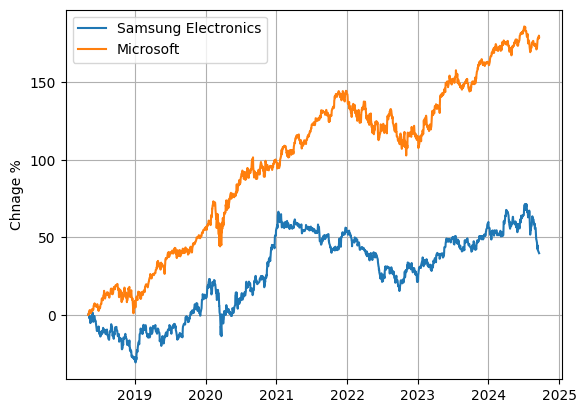

In [19]:
plt.plot(sec_dpc.cumsum(), label='Samsung Electronics')
plt.plot(msft_dpc.cumsum(), label='Microsoft')
plt.ylabel('Chnage %')
plt.grid(True)
plt.legend(loc='best')
plt.show()

In [28]:
kospi = pdr.get_data_yahoo('^KS11',start='2004-01-04') # 한국 주식 시장 지수
window = 252 # 1년 동안 개장일
peak = kospi['Adj Close'].rolling(window,min_periods=1).max() # 최고치
drawdown = kospi['Adj Close'] / peak - 1.0 # 하락률
max_dd = drawdown.rolling(window,min_periods=1).min() # 최대 하락률

[*********************100%%**********************]  1 of 1 completed


In [29]:
kospi['Adj Close']

Date
2004-01-05     824.099976
2004-01-06     823.429993
2004-01-07     827.070007
2004-01-08     824.150024
2004-01-09     845.270020
                 ...     
2024-09-11    2513.370117
2024-09-12    2572.090088
2024-09-13    2575.409912
2024-09-19    2580.800049
2024-09-20    2593.370117
Name: Adj Close, Length: 5115, dtype: float64

In [30]:
peak

Date
2004-01-05     824.099976
2004-01-06     824.099976
2004-01-07     827.070007
2004-01-08     827.070007
2004-01-09     845.270020
                 ...     
2024-09-11    2891.350098
2024-09-12    2891.350098
2024-09-13    2891.350098
2024-09-19    2891.350098
2024-09-20    2891.350098
Name: Adj Close, Length: 5115, dtype: float64

In [23]:
max_dd.min() # 최대 하락률, 서브프라임 금융위기 시점
max_dd[max_dd==max_dd.min()] # 최대 하락률 발생 일자

Date
2008-10-24   -0.545367
2008-10-27   -0.545367
2008-10-28   -0.545367
2008-10-29   -0.545367
2008-10-30   -0.545367
                ...   
2009-10-16   -0.545367
2009-10-19   -0.545367
2009-10-20   -0.545367
2009-10-21   -0.545367
2009-10-22   -0.545367
Name: Adj Close, Length: 252, dtype: float64

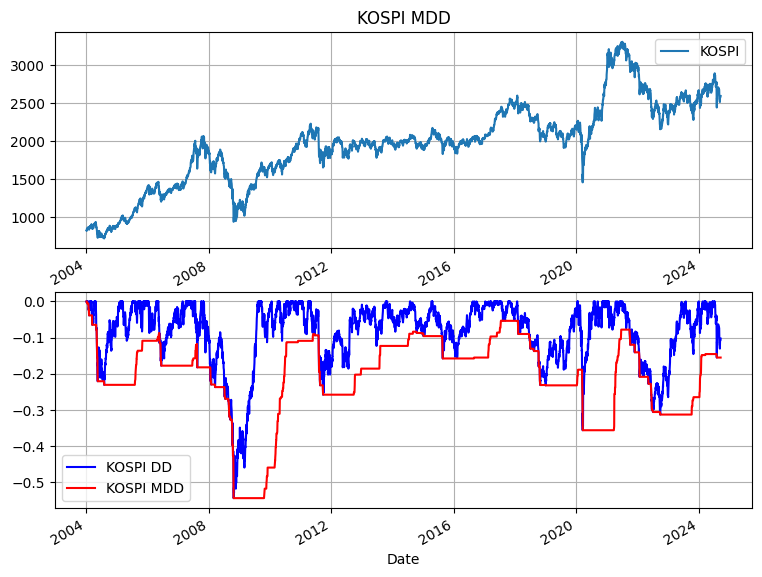

In [21]:
plt.figure(figsize=(9,7))
plt.subplot(211)
kospi['Close'].plot(label='KOSPI',title='KOSPI MDD',grid=True,legend=True)
plt.subplot(212)
drawdown.plot(c='blue',label='KOSPI DD',grid=True,legend=True)
max_dd.plot(c='red',label='KOSPI MDD',grid=True,legend=True)
plt.show()